# Previsão de inundações com dados de pluviosidade e nível do rio Pavia

## Passo 1: Importação das bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

## Passo 2: Carregar e visualizar os dados de precipitação

Leitura dos Dados de Pluviosidade 

In [2]:
df_pluviosidade = pd.read_csv("Pavia-Quantidade_chuva_por_hora.csv")

In [3]:
df_pluviosidade.head()

,Data/Hora,Precipitação atual (mm),Precipitação acumulada (mm)
0,2018-12-02 18:00:00,0.0,0.0
1,2018-12-02 17:00:00,0.0,0.0
2,2018-12-02 16:00:00,0.0,0.0
3,2018-12-02 15:00:00,0.0,0.0
4,2018-12-02 14:00:00,0.0,0.0


In [4]:
df_pluviosidade.shape

(78848, 3)

In [5]:
df_pluviosidade.describe()  


,Precipitação atual (mm),Precipitação acumulada (mm)
count,78844.000000,78847.000000
mean,0.049206,0.586580
std,0.765296,2.770216
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,110.000000,111.400000


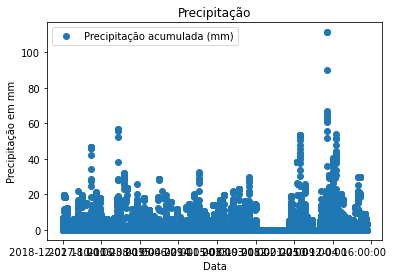

In [6]:
df_pluviosidade.plot(x='Data/Hora', y='Precipitação acumulada (mm)', style='o')  

plt.title('Precipitação')  
plt.xlabel('Data')  
plt.ylabel('Precipitação em mm')  
plt.show()  

## Passo 3: Carregar e visualizar os dados do nível do rio

Leitura dos Dados do Rio

In [7]:
df_rio = pd.read_csv("Pavia-Nivel_do_rio_por_hora.csv")

In [8]:
df_rio.head()

,Data/Hora,Nível (m)
0,2018-12-02 17:00:00,1.61
1,2018-12-02 16:00:00,1.61
2,2018-12-02 15:00:00,1.62
3,2018-12-02 14:00:00,1.63
4,2018-12-02 13:00:00,1.63


In [9]:
df_rio.shape

(78822, 2)

In [10]:
df_rio.describe()  

,Nível (m)
count,78822.000000
mean,1.453701
std,0.113859
min,0.000000
25%,1.400000
50%,1.450000
75%,1.500000
max,3.300000


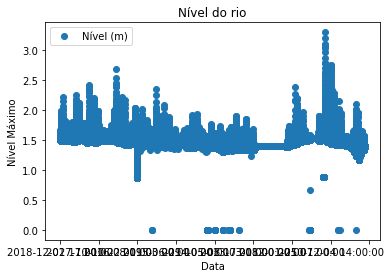

In [11]:
df_rio.plot(x='Data/Hora', y='Nível (m)', style='o')  
plt.title('Nível do rio')  
plt.xlabel('Data')  
plt.ylabel('Nível Máximo')  
plt.show()  

## Passo 4: Combinar os dois conjuntos de dados 

In [12]:
#df_rio["Data/Hora"] = df_rio["Data/Hora"].str.replace("00:00", "")
df = pd.merge(df_pluviosidade, df_rio, how='outer', on=['Data/Hora'])
df.head()

,Data/Hora,Precipitação atual (mm),Precipitação acumulada (mm),Nível (m)
0,2018-12-02 18:00:00,0.0,0.0,NaN
1,2018-12-02 17:00:00,0.0,0.0,1.61
2,2018-12-02 16:00:00,0.0,0.0,1.61
3,2018-12-02 15:00:00,0.0,0.0,1.62
4,2018-12-02 14:00:00,0.0,0.0,1.63


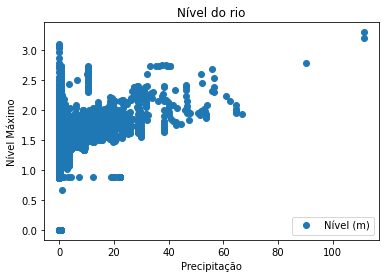

In [13]:
df.plot(x='Precipitação acumulada (mm)', y='Nível (m)', style='o')  
plt.title('Nível do rio')  
plt.xlabel('Precipitação')  
plt.ylabel('Nível Máximo')  
plt.show()  

## Passo 5: Limpar e preparar os dados

In [14]:
df['Precipitação acumulada (mm)'] = df['Precipitação acumulada (mm)'].fillna(0)
df['Nível (m)'] = df['Nível (m)'].fillna(0)

df.head()

,Data/Hora,Precipitação atual (mm),Precipitação acumulada (mm),Nível (m)
0,2018-12-02 18:00:00,0.0,0.0,0.00
1,2018-12-02 17:00:00,0.0,0.0,1.61
2,2018-12-02 16:00:00,0.0,0.0,1.61
3,2018-12-02 15:00:00,0.0,0.0,1.62
4,2018-12-02 14:00:00,0.0,0.0,1.63


In [15]:
#df = df[(df != 0).all(1)]

In [16]:
df = df.drop(columns=['Precipitação atual (mm)', 'Data/Hora'])
df.shape

(78850, 2)

In [17]:

X = df.iloc[:, :1].values
y = df.iloc[:, 1:2].values

In [18]:
#print(X)
#print(y)

## Passo 6: Dividir os dados em conjuntos de treino e teste 

In [19]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  


## Passo 7: Treinar o modelo de regressão linear 

In [20]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)  

LinearRegression()

In [21]:
print(regressor.intercept_)

[1.44348876]


In [22]:
print(regressor.coef_)  

[[0.01698111]]


In [23]:
y_pred = regressor.predict(X_test) 

## Passo 8: Realizar previsões e mostrar os resultados

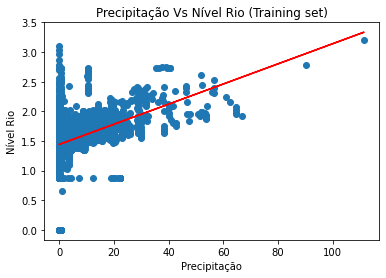

In [24]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.title('Precipitação Vs Nível Rio (Training set)')
plt.xlabel('Precipitação')
plt.ylabel('Nível Rio')
plt.show()

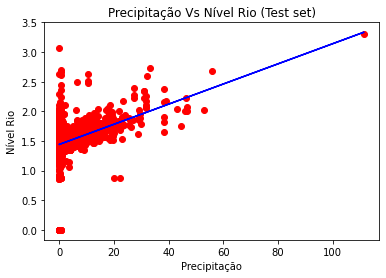

In [25]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Precipitação Vs Nível Rio (Test set)')
plt.xlabel('Precipitação')
plt.ylabel('Nível Rio')
plt.show()

## Passo 9: Testar o modelo com novos dados de precipitação 

In [26]:
#@title Insira a quantidade de precipitação em mm
Quantidade_de_Precipitação =  [[22]]
nível_do_rio_previsto = regressor.predict(Quantidade_de_Precipitação)
print(nível_do_rio_previsto)



[[1.81707313]]


## Passo 10: Avaliar a possibilidade de inundação 

In [27]:
if (nível_do_rio_previsto > 1.5):
  print("INUNDAÇÃO!!")
else:
  print("Não há inundação")

INUNDAÇÃO!!
